## Import Libraries

In [28]:
import pandas as pd
import numpy as np
import math
import pandas_bokeh
import plotly.express as px
import scipy

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
pandas_bokeh.output_notebook()

Loading BokehJS ...

## Import Data

In [4]:
product_metrics = pd.read_csv("data/product_level_metrics_v2.csv")
word_metrics = pd.read_csv("data/word_level_metrics_v2.csv")

## Preview Dataframes

In [5]:
product_metrics.head()

,Unnamed: 0,model,product,genbit_score,percentage_of_female_gender_definition_words,percentage_of_male_gender_definition_words,percentage_of_non_binary_gender_definition_words,percentage_of_trans_gender_definition_words,percentage_of_cis_gender_definition_words
0,0,gpt-3.5-turbo-0301,beer,0.979435,0.002475,0.128713,0.868812,1.0,0.0
1,1,gpt-3.5-turbo-0301,chocolate,1.197187,0.600649,0.107143,0.292208,1.0,0.0
2,2,gpt-3.5-turbo-0301,ice cream,0.477457,0.115242,0.092937,0.791822,1.0,0.0
3,3,gpt-3.5-turbo-0301,protein powder,0.707619,0.261484,0.540636,0.197880,1.0,0.0
4,4,gpt-3.5-turbo-0301,a weight loss programme,1.477367,0.691099,0.073298,0.235602,1.0,0.0


In [6]:
word_metrics.head()

,Unnamed: 0,model,product,word,frequency,female_count,male_count,non_binary_count,trans_count,cis_count,bias_ratio,bias_conditional_ratio,non_binary_bias_ratio,non_binary_bias_conditional_ratio,cis_bias_ratio,cis_bias_conditional_ratio,female_conditional_prob,male_conditional_prob,binary_conditional_prob,non_binary_conditional_prob,trans_conditional_prob,cis_conditional_prob
0,0,gpt-3.5-turbo-0301,beer,shot,132,1.95,11.762912,105.971996,1,1,1.797122,1.684045,-2.120557,-1.636015,0.0,0.0,0.004577,0.024660,0.029238,0.136562,0.0,0.0
1,1,gpt-3.5-turbo-0301,beer,sit,30,1.00,4.664506,41.360412,1,1,1.539982,1.426905,-2.182342,-1.697800,0.0,0.0,0.002347,0.009779,0.012126,0.053299,0.0,0.0
2,2,gpt-3.5-turbo-0301,beer,bar,56,1.00,11.708406,72.053659,1,1,2.460307,2.347230,-1.817104,-1.332562,0.0,0.0,0.002347,0.024546,0.026893,0.092853,0.0,0.0
3,3,gpt-3.5-turbo-0301,beer,laugh,41,1.00,1.902500,73.414284,1,1,0.643169,0.530092,-3.652950,-3.168408,0.0,0.0,0.002347,0.003988,0.006336,0.094606,0.0,0.0
4,4,gpt-3.5-turbo-0301,beer,clinking,32,1.00,3.488531,48.312630,1,1,1.249481,1.136404,-2.628212,-2.143671,0.0,0.0,0.002347,0.007313,0.009661,0.062259,0.0,0.0


## Top 5 Products/Models by Female %, Male % and Non-Binary %

In [7]:
product_metrics.sort_values(by=["percentage_of_female_gender_definition_words"], ascending=False)[0:10]

,Unnamed: 0,model,product,genbit_score,percentage_of_female_gender_definition_words,percentage_of_male_gender_definition_words,percentage_of_non_binary_gender_definition_words,percentage_of_trans_gender_definition_words,percentage_of_cis_gender_definition_words
15,15,gpt-3.5-turbo-0301,bubble bath,1.734305,0.906091,0.058376,0.035533,1.0,0.0
71,71,gpt-4-0613,bubble bath,1.899624,0.876667,0.016667,0.106667,1.0,0.0
43,43,Bard - PaLM,bubble bath,2.065427,0.866667,0.007407,0.125926,1.0,0.0
38,38,Bard - PaLM,furniture polish,1.739107,0.860507,0.036232,0.103261,1.0,0.0
34,34,Bard - PaLM,a car,1.890584,0.855098,0.023256,0.121646,1.0,0.0
31,31,Bard - PaLM,protein powder,2.001550,0.821608,0.010050,0.168342,1.0,0.0
39,39,Bard - PaLM,a washing machine,1.990559,0.815891,0.009690,0.174419,1.0,0.0
66,66,gpt-4-0613,furniture polish,1.508321,0.788732,0.007042,0.204225,1.0,0.0
37,37,Bard - PaLM,a clothes shop,2.048315,0.738129,0.008633,0.253237,1.0,0.0
29,29,Bard - PaLM,chocolate,1.565619,0.735385,0.050769,0.213846,1.0,0.0


In [8]:
product_metrics.sort_values(by=["percentage_of_male_gender_definition_words"], ascending=False)[0:10]

,Unnamed: 0,model,product,genbit_score,percentage_of_female_gender_definition_words,percentage_of_male_gender_definition_words,percentage_of_non_binary_gender_definition_words,percentage_of_trans_gender_definition_words,percentage_of_cis_gender_definition_words
33,33,Bard - PaLM,a lawnmower,1.939277,0.005455,0.936364,0.058182,1.0,0.0
5,5,gpt-3.5-turbo-0301,a lawnmower,1.503379,0.073333,0.820000,0.106667,1.0,0.0
45,45,Bard - PaLM,electric drills,1.448741,0.075157,0.757829,0.167015,1.0,0.0
73,73,gpt-4-0613,electric drills,1.222499,0.048611,0.638889,0.312500,1.0,0.0
61,61,gpt-4-0613,a lawnmower,1.032938,0.097222,0.625000,0.277778,1.0,0.0
3,3,gpt-3.5-turbo-0301,protein powder,0.707619,0.261484,0.540636,0.197880,1.0,0.0
17,17,gpt-3.5-turbo-0301,electric drills,1.142620,0.085106,0.507599,0.407295,1.0,0.0
59,59,gpt-4-0613,protein powder,0.845249,0.156398,0.488152,0.355450,1.0,0.0
50,50,Bard - PaLM,a games console,1.146944,0.087866,0.351464,0.560669,1.0,0.0
22,22,gpt-3.5-turbo-0301,a games console,0.947610,0.089506,0.342593,0.567901,1.0,0.0


In [9]:
product_metrics.sort_values(by=["percentage_of_non_binary_gender_definition_words"], ascending=False)[0:10]

,Unnamed: 0,model,product,genbit_score,percentage_of_female_gender_definition_words,percentage_of_male_gender_definition_words,percentage_of_non_binary_gender_definition_words,percentage_of_trans_gender_definition_words,percentage_of_cis_gender_definition_words
6,6,gpt-3.5-turbo-0301,a car,0.012882,0.000000,0.038462,0.961538,1.0,0.0
75,75,gpt-4-0613,a science museum,0.172474,0.033520,0.011173,0.955307,1.0,0.0
28,28,Bard - PaLM,beer,0.266363,0.010256,0.046154,0.943590,1.0,0.0
78,78,gpt-4-0613,a games console,0.192962,0.032609,0.065217,0.902174,1.0,0.0
0,0,gpt-3.5-turbo-0301,beer,0.979435,0.002475,0.128713,0.868812,1.0,0.0
76,76,gpt-4-0613,an art gallery,0.416344,0.000000,0.131783,0.868217,1.0,0.0
56,56,gpt-4-0613,beer,0.561610,0.005155,0.128866,0.865979,1.0,0.0
53,53,Bard - PaLM,a weightlifting class,0.579832,0.099656,0.061856,0.838488,1.0,0.0
27,27,gpt-3.5-turbo-0301,therapy,0.957738,0.164983,0.010101,0.824916,1.0,0.0
21,21,gpt-3.5-turbo-0301,a bookshop,0.562232,0.123810,0.052381,0.823810,1.0,0.0


In [61]:
product_metrics[(product_metrics['model']=='gpt-4-0613') & (product_metrics['genbit_score']>1.5)]

,Unnamed: 0,model,product,genbit_score,percentage_of_female_gender_definition_words,percentage_of_male_gender_definition_words,percentage_of_non_binary_gender_definition_words,percentage_of_trans_gender_definition_words,percentage_of_cis_gender_definition_words
66,66,gpt-4-0613,furniture polish,1.508321,0.788732,0.007042,0.204225,1.0,0.0
71,71,gpt-4-0613,bubble bath,1.899624,0.876667,0.016667,0.106667,1.0,0.0


In [ ]:
gen

## Plot Overall Statistics by Model

### Distribution of Genbit Scores

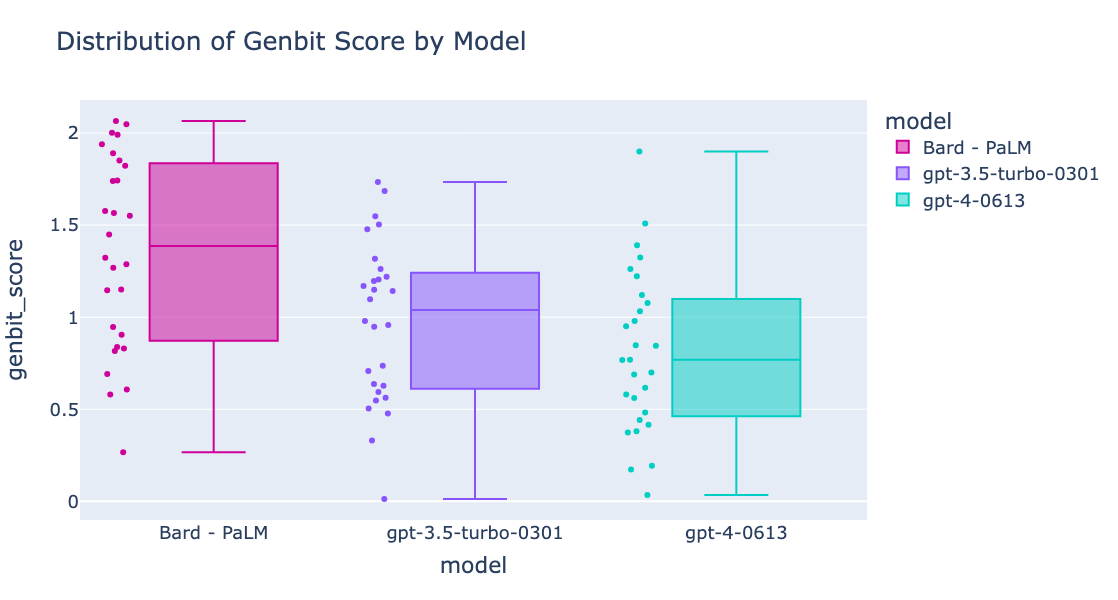

In [27]:
fig = px.box(product_metrics, x="model", y = "genbit_score", points="all", hover_data=["product"], 
             title="Distribution of Genbit Score by Model", category_orders={'model':['Bard - PaLM','gpt-3.5-turbo-0301','gpt-4-0613']}, 
             height=600, width=1000, color='model',color_discrete_sequence=["#CE0099","#8854FC","#00CEC3"])

fig.update_layout(font=dict(size=18))

fig.show()

In [29]:
from scipy.stats import f_oneway

[0.2663625689811301,
 1.5656192098009327,
 0.6919455738452325,
 2.001550077573952,
 1.1509327076813458,
 1.939276605036144,
 1.8905840337575777,
 0.8166314789765177,
 0.9047112256904296,
 2.0483147778284883,
 1.7391066067836716,
 1.990559015775864,
 1.3235445094700329,
 1.742653913959107,
 1.57615465331532,
 2.0654271083262565,
 1.82268935122668,
 1.4487405078287452,
 0.9463878408788432,
 0.6073179857599943,
 1.2684426851542254,
 1.5503066836313606,
 1.1469444786571883,
 1.287159288759807,
 0.8299459519865708,
 0.5798324090983829,
 0.8387378656496967,
 1.8505363056243285]

In [44]:
np.median(bard)

1.386142508649389

In [34]:
gpt3_5= product_metrics[product_metrics["model"]=="gpt-3.5-turbo-0301"]["genbit_score"].to_list()
bard=product_metrics[product_metrics["model"]=="Bard - PaLM"]["genbit_score"].to_list()
gpt4 = product_metrics[product_metrics["model"]=="gpt-4-0613"]["genbit_score"].to_list()

In [35]:
f_oneway(gpt3_5, bard, gpt4)

F_onewayResult(statistic=9.927171832801767, pvalue=0.00013931942161770708)

In [36]:
from scipy import stats
stats.ttest_1samp(gpt3_5, popmean=0.3, alternative='greater')

TtestResult(statistic=8.243367970374122, pvalue=3.759426912829905e-09, df=27)

In [37]:
stats.ttest_1samp(bard, popmean=0.3, alternative='greater')

TtestResult(statistic=10.6295594674807, pvalue=1.8855095746595707e-11, df=27)

In [38]:
stats.ttest_1samp(gpt4, popmean=0.3, alternative='greater')

TtestResult(statistic=6.098142130721166, pvalue=8.17100292953906e-07, df=27)

In [39]:
example = [0.1,0.03,0,-2]

In [40]:
stats.ttest_1samp(example, popmean=0.3, alternative='greater')

TtestResult(statistic=-1.5011851025518164, pvalue=0.884850203757058, df=3)

### Female v Male Words

In [51]:
female_words = product_metrics.pivot(index="product",columns="model",values="percentage_of_female_gender_definition_words").sort_values(by=["Bard - PaLM"],ascending=False)
male_words = product_metrics.pivot(index="product",columns="model",values="percentage_of_male_gender_definition_words").sort_values(by=["Bard - PaLM"],ascending=False)
non_binary_words = product_metrics.pivot(index="product",columns="model",values="percentage_of_non_binary_gender_definition_words").sort_values(by=["Bard - PaLM"],ascending=False)

In [56]:
female_plot = female_words[0:10].sort_values(by=["gpt-3.5-turbo-0301"],ascending=True).plot_bokeh.barh(
                          y=["Bard - PaLM","gpt-3.5-turbo-0301","gpt-4-0613"],
                        xlabel="Percentage of Female Definition Words",ylabel="Product", 
                        title="Percentage of Female Words",
                        figsize=(500,500),
                        colormap = ["#00CEC3","#8854FC","#CE0099"],
                        legend = "bottom_right",
                        fontsize_label="10pt",
                        fontsize_ticks="10pt",
                        fontsize_title="12pt",
                        show_figure=False
                          )

In [59]:
male_plot = male_words[0:10].sort_values(by=["gpt-3.5-turbo-0301"],ascending=True).plot_bokeh.barh(
                          y=["Bard - PaLM","gpt-3.5-turbo-0301","gpt-4-0613"],
                        xlabel="Percentage of Male Definition Words",ylabel="Product", 
                        title="Percentage of Male Words",
                        figsize=(500,500),
                        colormap = ["#00CEC3","#8854FC","#CE0099"],
                        legend = "bottom_right",
                        fontsize_label="10pt",
                        fontsize_ticks="10pt",
                        fontsize_title="12pt",
                        show_figure=False
                          )

In [54]:
non_binary_plot = non_binary_words[0:10].sort_values(by=["Bard - PaLM"],ascending=True).plot_bokeh.barh(
                          y=["Bard - PaLM","gpt-3.5-turbo-0301","gpt-4-0613"],
                        xlabel="Percentage of Non-Binary Definition Words",ylabel="Product", 
                        title="Percentage of Non-Binary Words",
                        figsize=(500,500),
                        colormap = ["#00CEC3","#8854FC","#CE0099"],
                        legend = "bottom_right",
                        fontsize_label="10pt",
                        fontsize_ticks="10pt",
                        fontsize_title="12pt",
                        show_figure=False
                          )

In [60]:
pandas_bokeh.plot_grid([[female_plot,male_plot]])

Column(id='1935', ...)

In [29]:
pandas_bokeh.plot_grid([[male_plot,non_binary_plot]])

Column(id='3233', ...)

In [17]:
sorted_male_words = male_words.sort_values(by=["Bard - PaLM"],ascending=False)

In [18]:
scatter = product_metrics[["model","genbit_score","product","percentage_of_male_gender_definition_words","percentage_of_female_gender_definition_words"]].plot_bokeh.scatter(
    x="genbit_score", 
    y="percentage_of_female_gender_definition_words",
    category="model",
    title="Percentage of Female Gender Definition Words v. Male Gender Definition Words",
    legend = "top_left",
)

In [19]:
scatter = product_metrics[["model","genbit_score","product","percentage_of_male_gender_definition_words","percentage_of_female_gender_definition_words"]].plot_bokeh.scatter(
    x="genbit_score", 
    y="percentage_of_male_gender_definition_words",
    category="model",
    title="Percentage of Female Gender Definition Words v. Male Gender Definition Words",
    legend = "top_left",
)

## Word Analysis

In [20]:
word_metrics[word_metrics["bias_ratio"]<-0.5].groupby(by=["word"]).count()[["product"]].sort_values(by=["product"],ascending=False)[0:20]

,product
word,
smile,56
narrator,55
scene,53
voiceover,51
time,42
sit,37
close,37
start,36
happy,35


In [21]:
word_metrics[word_metrics["bias_ratio"]>0.5].groupby(by=["word"]).count()[["product"]].sort_values(by=["product"],ascending=False)[0:20]

,product
word,
scene,20
voiceover,19
narrator,18
time,17
perfect,16
cut,16
shot,15
smile,14
camera,14
